# Police shooting reports
-

In [43]:
import pandas as pd
import psycopg2 as p
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [64]:
conn= p.connect(host='localhost', dbname= 'Police_shooting', user='postgres', password='Sekou422')
cur = conn.cursor()
cur.execute('SELECT * FROM shooting_reports')
data = cur.fetchall()

In [70]:
cols=['id', 'name','record_date','manner_of_death', 'armed', 'age','gender','race',
	 'city','states','sign_of_mental_illness','threat_level', 'flee','body_camera','arms_category']
df = pd.DataFrame(data,columns=cols)
print(df.shape)
display(df.head(3))


(4895, 15)


,id,name,record_date,manner_of_death,armed,age,gender,race,city,states,sign_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed


,id
id,1.0


In [46]:
tokeep = ['Black','White','Hispanic']
df1=df[df.race.isin(tokeep)]


In [47]:
df1.race.value_counts()
value = list(df1.race.value_counts())
name = list(dict(df1.race.value_counts()).keys())

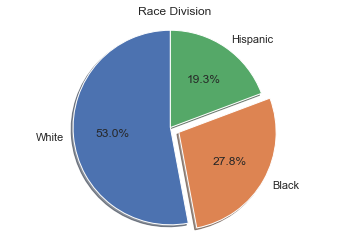

In [48]:
plt.pie(value
        ,labels=name
        ,autopct='%1.1f%%'
        ,shadow = True
        ,explode = [0,.1,0]
        ,startangle=90)

plt.title('Race Division')
plt.axis('equal')
plt.show()

In [49]:
camera=df1.body_camera.value_counts()
value = list(camera)
name = list(dict(df.body_camera.value_counts()).keys())

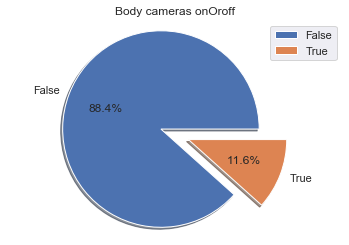

In [50]:
sns.set()
plt.pie(value
       ,labels = name
       ,autopct='%1.1f%%'
       ,shadow = True
       ,explode= [.3,0])
plt.title('Body cameras onOroff')
plt.legend()
plt.axis('equal')
plt.show()

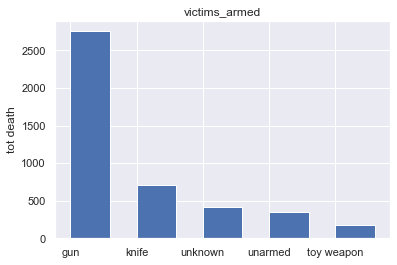

In [51]:
armed = df.armed.value_counts()
value = list(armed)
name = list(dict(armed).keys())

name = name[0:5]
value = value[0:5]

plt.bar(name
       ,value
       ,align='edge'
       ,width=0.6)
plt.title('victims_armed')
plt.ylabel('tot death')
plt.show()

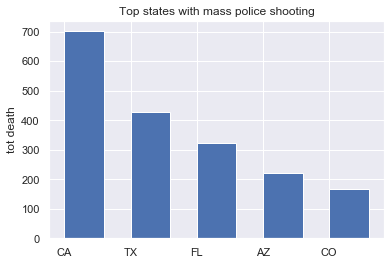

In [52]:
sns.set()
states = df.states.value_counts()
value = list(states)
name = list(dict(states).keys())
value = value[:5]
name = name[:5]

plt.bar(name
       ,value
       ,align='edge'
       ,width=0.6)

plt.title('Top states with mass police shooting')
plt.ylabel('tot death')
plt.show()

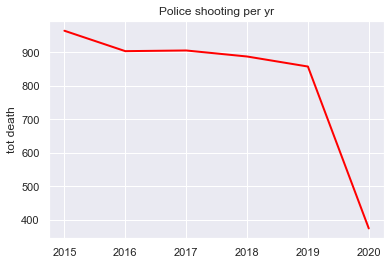

In [53]:
df2= df.copy()
df2.record_date
df2['record_date'] = pd.DatetimeIndex(df2['record_date']).year
years = df2.record_date.value_counts()
years.sort_index(inplace=True)

value = years.values
name = years.index

plt.plot(name
        ,value
        ,linewidth = 2
        ,color = 'red')
plt.title('Police shooting per yr')
plt.ylabel('tot death')
plt.show()



In [54]:
type(name)

pandas.core.indexes.numeric.Int64Index

Mental and Sane

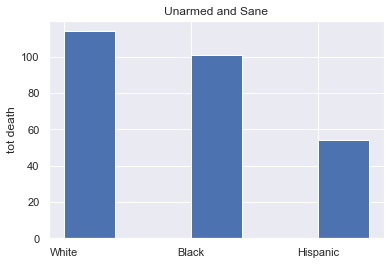

In [55]:
MentalUnarmed = df1[(df1.sign_of_mental_illness =='False')&(df1.armed =='unarmed')]
value =list(MentalUnarmed.race.value_counts())
name = list(dict(MentalUnarmed.race.value_counts()).keys())

plt.bar(name
        ,value
        ,align='edge'
        ,width=0.4)
plt.title('Unarmed and Sane')
plt.ylabel('tot death')
plt.show()


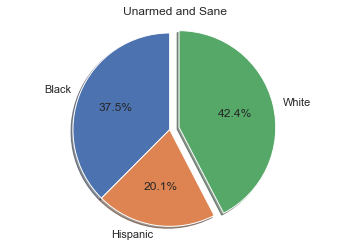

In [56]:
MentalUnarmed2 = df1[(df1.sign_of_mental_illness == 'False')&(df1.armed == 'unarmed')]
mentalU = MentalUnarmed2.race.value_counts()
mentalU.sort_index(inplace=True)

value = mentalU.values
name = mentalU.index

plt.pie(value,
       labels=name
       ,autopct='%1.1f%%'
       ,shadow = True
       ,explode = [0,0,.1] 
       ,startangle = 90
       )
plt.title('Unarmed and Sane')
plt.axis('equal')
plt.show()


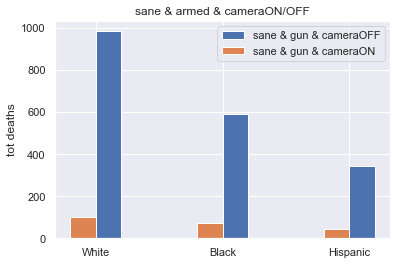

In [57]:
MentalUnarmed3 = df1[(df1.sign_of_mental_illness == 'False')&(df1.armed == 'gun')&(df1.body_camera =='False')]
sane_cameraOn = df1[(df1.sign_of_mental_illness == 'False')&(df1.armed == 'gun')&(df1.body_camera =='True')]

data= MentalUnarmed3.race.value_counts()
data1 = sane_cameraOn.race.value_counts()
name = list(dict(data).keys())

x = np.arange(len(name))
width = 0.2

fig,ax = plt.subplots()
fig1= ax.bar(x+width/2, data, width, label='sane & gun & cameraOFF' ) 
fig2 = ax.bar(x-width/2, data1, width, label='sane & gun & cameraON')

ax.set_title('sane & armed & cameraON/OFF')
ax.set_ylabel('tot deaths')
ax.set_xticks(x)
ax.set_xticklabels(name)
ax.legend()
plt.show()


Police officiers seems to have their body camera off for most of the encounter with victims who were in possession of a gun

In [58]:
MentalUnarmed4 = df1[(df1.sign_of_mental_illness == 'False')&(df1.armed == 'gun')&(df1.body_camera =='False')]
MentalUnarmed4.race.value_counts()

White       985
Black       590
Hispanic    343
Name: race, dtype: int64

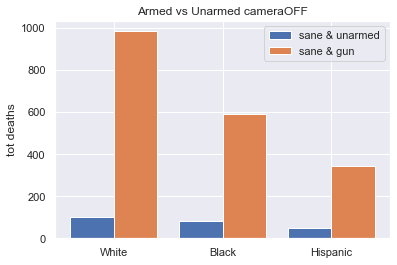

In [59]:
MentalUnarmed3 = df1[(df1.sign_of_mental_illness == 'False')&(df1.armed == 'unarmed')&(df1.body_camera =='False')]
MentalUnarmed4 = df1[(df1.sign_of_mental_illness == 'False')&(df1.armed == 'gun')&(df1.body_camera =='False')]

data= MentalUnarmed3.race.value_counts()
value = list(data)

data1= MentalUnarmed4.race.value_counts()
value1 = list(data1)

name= list(dict(data).keys())
x = np.arange(len(name))
width = 0.4

fig, ax = plt.subplots()
fig1 = ax.bar(x-width/2, value, width, label='sane & unarmed')
fig2 = ax.bar(x+width/2, value1, width, label = 'sane & gun')

ax.set_ylabel('tot deaths')
ax.set_title('Armed vs Unarmed cameraOFF')
ax.set_xticks(x)
ax.set_xticklabels(name)
ax.legend()
plt.show()